# K-Means

# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

In [4]:
from scipy.spatial.distance import cdist

class K_Means():
    """Self implementation of k-means algorithm"""
    
    def __init__(self, n_clusters=6, max_iter=300, centroids=[]):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array(centroids, dtype=np.float)
    
    def fit(self, data):    
        if(self.centroids.shape == (0,)):
            self.centroids = data[ np.random.randint(0, data.shape[0], self.n_clusters), :]
            
        for i in range(0, self.max_iter):
            distances = cdist(data, self.centroids)
            c_ind = np.argmin(distances, axis=1)
            # self.centroids = np.array([np.mean(data[c_ind == i], axis=0) for i in range(0, self.n_clusters) if i in c_ind]
            for i in range(0, self.n_clusters):
                if i in c_ind:
                    self.centroids[i] = np.mean(data[c_ind == i], axis=0) 
    
    def predict(self, samples):
        distances = cdist(samples, self.centroids)
        return np.argmin(distances, axis=1)        

In [5]:
def plotKMeans(x, y, centroids, subplot, title):
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1],c=y)
    plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')
    plt.title(title)

[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]
[5 1]


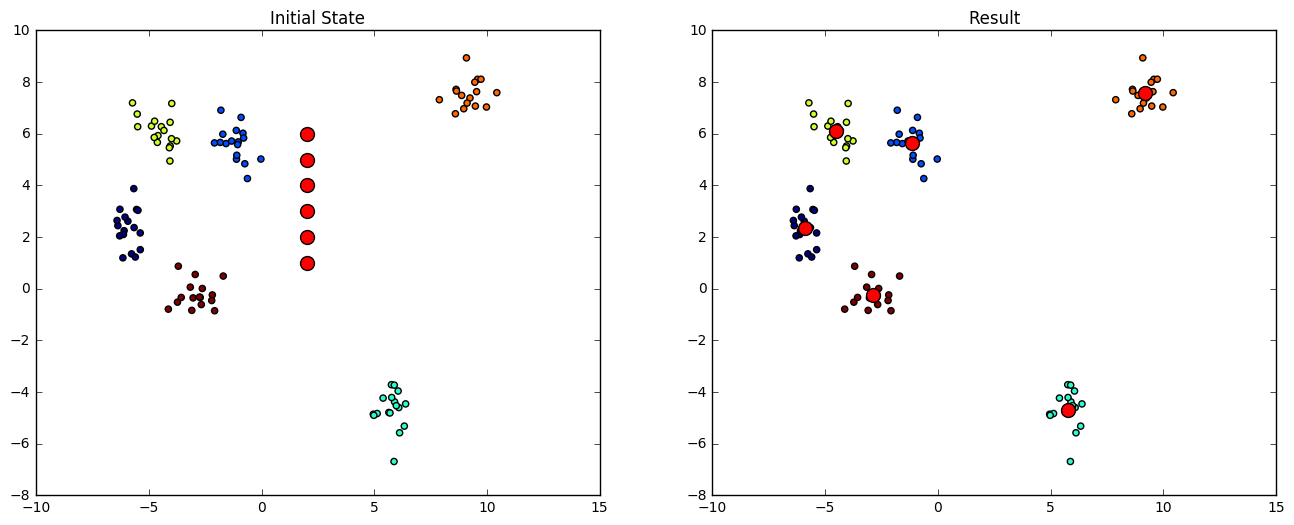

In [6]:
x,y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)

kmeans = K_Means(max_iter=300, centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))

plt.figure(figsize=(16,6))
plotKMeans(x, y, kmeans.centroids, 121, 'Initial State')

kmeans.fit(x)
print(kmeans.centroids)

plotKMeans(x, y, kmeans.centroids, 122, 'Result')

print(kmeans.predict(np.array([[10,7],[0,0]])))

# K-Means of Scikit-Learn

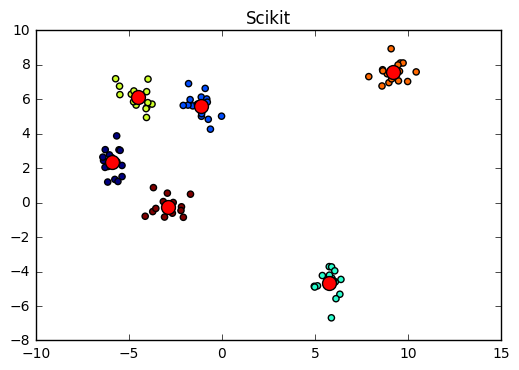

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(x)
pred = kmeans.predict(x)

plotKMeans(x, y, kmeans.cluster_centers_, 111, 'Scikit')